<h1 style="text-align: center;">Finansal Veri Analitiği ve Tahmin Projesi</h1>

# Projenin amacı : 

<p>Belirli bir hisse senedinin kapanış değerini etkileyen faktörleri analiz ederek, finansal veriler üzerinde çalışmayı ve bu faktörler arasındaki ilişkileri görsel olarak ortaya koymayı amaçlıyorum. Ayrıca, hisse senedinin üzerinde temel istatistik analizler yaparak içinde bulunduğu trendi anlamak için şu indikatörleri kullanmayı hedefliyorum:</p>
<ul>
  <li><strong>OBV (On-Balance Volume)</strong></li>
  <li><strong>SMA (Simple Moving Average)</strong></li>
  <li><strong>Bollinger Bantları</strong></li>
  <li><strong>RSI (Relative Strength Index)</strong></li>
</ul>
<p>Bununla birlikte, derin öğrenme modellerini de kullanarak daha kapsamlı bir fiyat tahmin modeli geliştirmeyi planlıyorum.</p>


# Projenin Adımları : 

 <ol>
        <li>Veri setinin yfinance kütüphanesi kullanılarak eklenmesi.</li>
        <li>Eksik veri kontrolü yapılması.</li>
        <li>Veri setinin temel istatistiksel analizlerinin yapılması.</li>
        <li>Günlük fiyat değişimlerinin standart sapmasının bulunması.</li>
        <li>Veri setindeki değerlerin  Korelasyon Haritasının oluşturulması.</li>
        <li>On Balance Volume (OBV) indikatörünün hesaplanması ve yorumlanması.</li>
        <li>Basit Hareketli Ortalama (SMA) hesaplanması.</li>
        <li>Bollinger Bantlarının hesaplanması.</li>
        <li>Göreceli Güç Endeksi (RSI) hesaplanması.</li>
        <li>Derin öğrenme modelinin oluşturulması.</li>
        <li>Modelin gerçek verilerle test edilmesi.</li>
        <li>Modeldeki muhtemel sapma unsurunun bulunması ve görselleştirilmesi.</li>
    </ol>

<h5>Geliştiren  : Hüseyin Erol</h5>

Kişisel websitem : https://huseyineroll.com/

Github : https://github.com/HuseyinErol24

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_ta as ta

# Veri setinin eklenmesi

In [2]:
veri_seti = yf.download(["EREGL.IS"],start = "2020-01-01",end ="2024-02-27")
# "yfinance" kütüphanesini kullanarak EREGL.IS  hissesine ait günlük fiyat verilerini çekilmesi.

[*********************100%%**********************]  1 of 1 completed


In [3]:
veri_seti.head()  #veri setinin ilk 5 verisi 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,9.04,9.13,8.98,9.10,5.830760,16632302
2020-01-03,9.07,9.11,8.86,8.96,5.741055,19563829
2020-01-06,8.90,8.92,8.68,8.87,5.683388,23400449
2020-01-07,8.95,9.11,8.91,8.93,5.721833,21253482
2020-01-08,8.81,9.05,8.78,8.92,5.715425,23700573


In [4]:
veri_seti[len(veri_seti)-5:len(veri_seti)] #veri setinin son 5 verisi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,48.580002,49.619999,48.320000,49.619999,49.619999,164880324
2024-02-21,50.900002,51.000000,47.880001,48.639999,48.639999,325661707
2024-02-22,48.820000,48.840000,47.799999,48.180000,48.180000,153762374
2024-02-23,47.360001,47.419998,46.500000,46.500000,46.500000,153601706
2024-02-26,46.580002,46.619999,45.580002,45.580002,45.580002,130252572


# Eksik veri Kontrolü

In [5]:
#Eksik veri kontrolü
if(veri_seti.isnull().sum().sum() == 0):
    print("Eksik veri yok")
else:
    print("eksik veri mevcut")


Eksik veri yok


# TEMEL istatiksel analizler

In [6]:
#TEMEL istatiksel analizler
veri_seti.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1.042000e+03
mean,25.595365,26.042294,25.167313,25.566123,24.122491,6.632191e+07
std,12.579621,12.808169,12.340295,12.530499,13.610857,5.508835e+07
min,7.130000,7.580000,6.780000,7.370000,4.722274,0.000000e+00
25%,14.622500,14.832500,14.285000,14.592500,11.307106,2.868327e+07
50%,27.840000,28.280001,27.410000,27.799999,25.714920,4.925605e+07
75%,37.145000,37.735002,36.335000,36.990001,36.990001,8.450929e+07
max,50.900002,53.549999,49.380001,49.860001,49.860001,4.333239e+08


# Günlük Fiyat Değişimlerinin Standart Sapmasının Bulunması

In [7]:
#Gümlük kapanış degerinin  fiyat Değişimi
günlük_Değişim = veri_seti["Close"].diff()

In [8]:
günlük_Değişim[1:5] #bir önceki gün ile arasındaki fark

Date
2020-01-03   -0.14
2020-01-06   -0.09
2020-01-07    0.06
2020-01-08   -0.01
Name: Close, dtype: float64

In [9]:
#bu degerin stndat sapmasını bulmak istersek
standart_Sapma = günlük_Değişim.std() 

In [10]:
print("Günlük fiyat değişimlerinin standart sapması:", standart_Sapma)


Günlük fiyat değişimlerinin standart sapması: 0.8045100047603084


<p>bu işlem günlük fiyat değişimlerinin değişkenliğini ölçmeye ve fiyatların ne kadar dalgalı olduğunu belirlemeye yardımcı olur.</p>

# Veri Setindeki Değerlerin Korelasyon Haritası

Text(0.5, 1.0, 'Korelasyon Haritası')

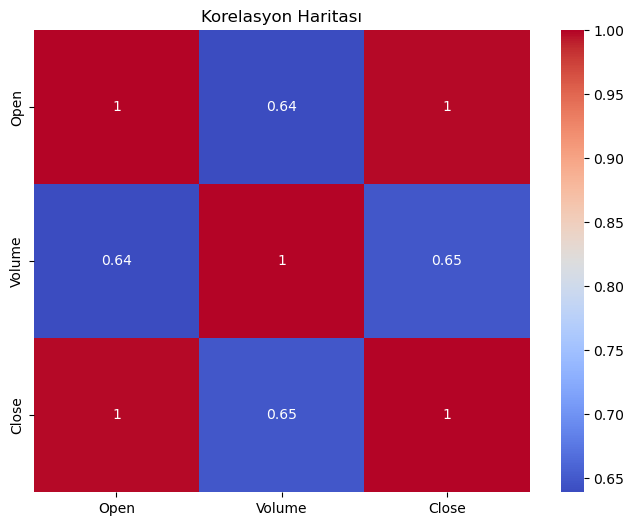

In [11]:
correlation_matrix = veri_seti[["Open","Volume","Close"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Haritası')

Bu işlem, belirli özellikler arasındaki ilişkileri görsel olarak analiz etmek amacıyla kullanılır. Bu, özelliklerin birbirleriyle olan ilişkilerini anlamak ve bu ilişkileri modelleme veya analiz süreçlerinde dikkate almak için yardımcı olur. Korelasyon katsayısı, sonuç ne kadar 1'e yakınsa, arasındaki ilişkinin o kadar doğrusal olduğu çıkarımını yapmamıza olanak tanır.

# Günlere Göre Kapanış Değerlerinin Grafiği

Text(0.5, 1.0, 'Günlere göre kapaış degeri')

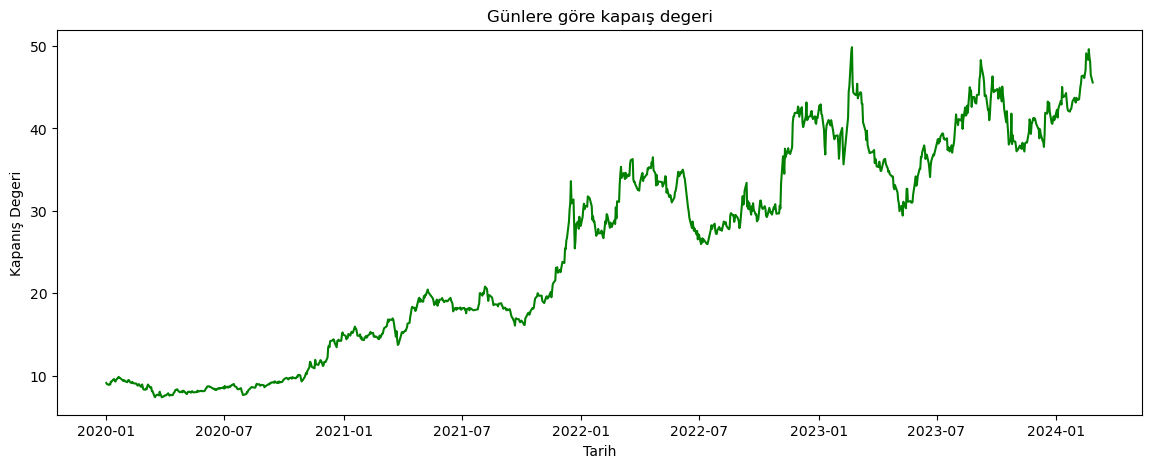

In [12]:
plt.figure(figsize=(14,5))
plt.plot(veri_seti["Close"],"green")
plt.xlabel("Tarih")
plt.ylabel("Kapanış Degeri")
plt.title("Günlere göre kapaış degeri")

# OBV (On Balance Volume) İndikatörü ve Yorumlanışı

<p><strong>OBV (On Balance Volume)</strong>, fiyat hareketleri ile işlem hacmi arasındaki ilişkiyi inceler. Eğer fiyatlar yükselirken işlem hacmi de artıyorsa, OBV artar. Fiyatlar düşerken işlem hacmi azalıyorsa, OBV düşer. Bu gösterge, fiyat değişimlerinin gücünü ve trendin devam edip etmeyeceğini anlamak için kullanılır. OBV'nin artması, fiyatların yukarı yönlü bir hareket gösterebileceğini, düşmesi ise fiyatların aşağı yönlü bir hareket gösterebileceğini gösterebilir.</p>

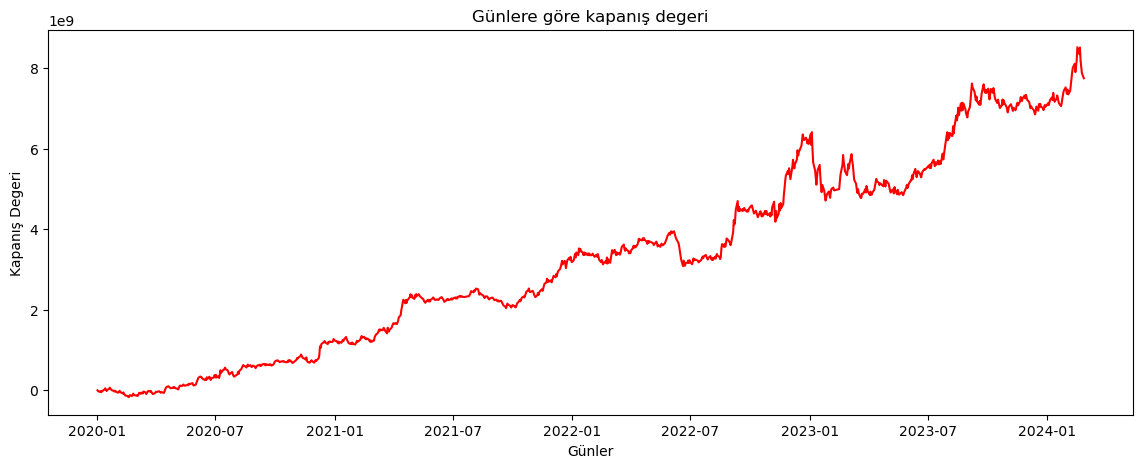

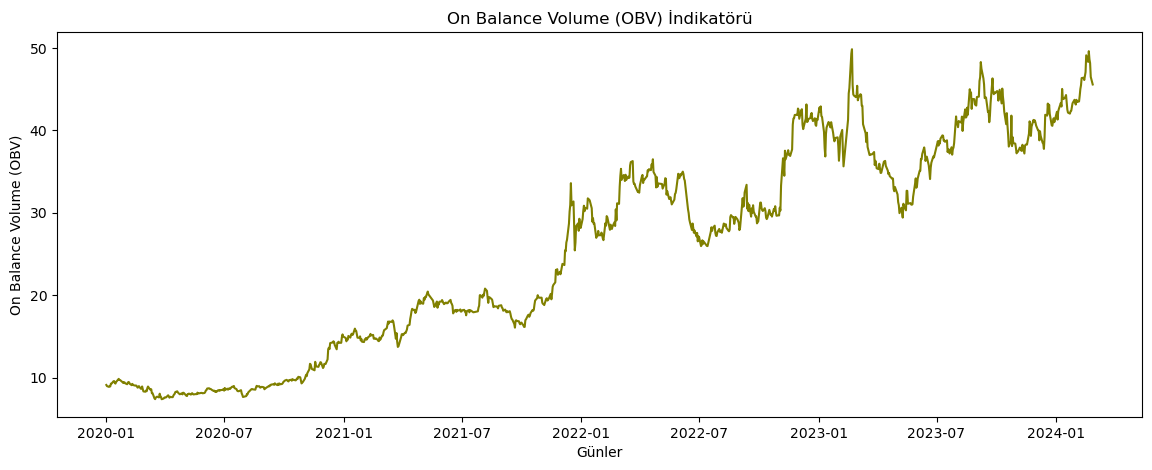

In [13]:
obv = [0]

for i in range(1, len(veri_seti)):
    if veri_seti["Close"].iloc[i] > veri_seti["Close"].iloc[i - 1]:
        obv.append(obv[-1] + veri_seti["Volume"].iloc[i])
    elif veri_seti["Close"].iloc[i] < veri_seti["Close"].iloc[i - 1]:
        obv.append(obv[-1] - veri_seti["Volume"].iloc[i])
    else:
        obv.append(obv[-1])#listenin son elamanını geri ekliyorum

plt.figure(figsize=(14, 5))
plt.plot(veri_seti.index,obv,"red")
plt.xlabel("Günler")
plt.ylabel("Kapanış Degeri")
plt.title("Günlere göre kapanış degeri")

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()
ax.set_title("On Balance Volume (OBV) İndikatörü")
ax.set_ylabel("On Balance Volume (OBV)")
ax.set_xlabel("Günler")
ax.plot(veri_seti.index, veri_seti["Close"],"olive")


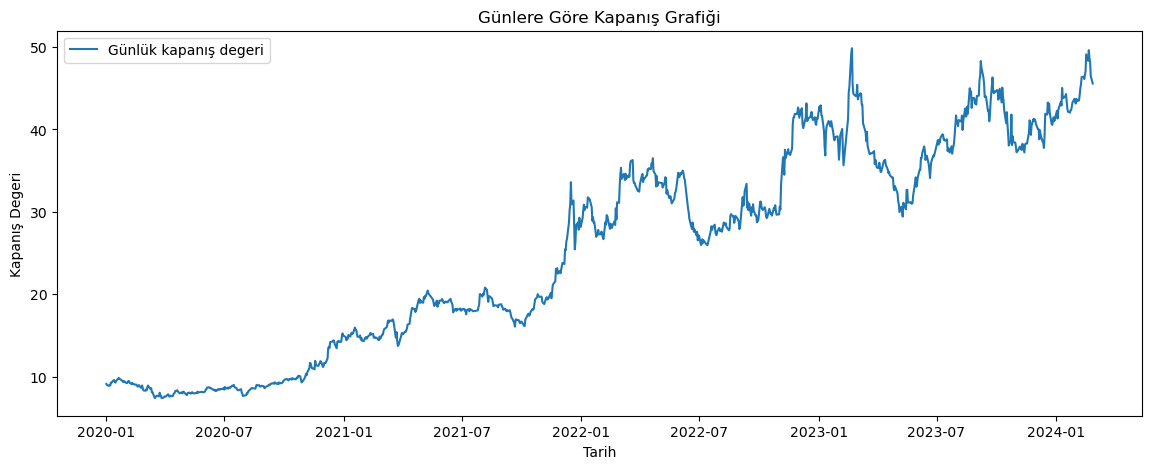

In [14]:
plt.figure(figsize=(14,5))
plt.xlabel("Tarih")
plt.ylabel("Kapanış Degeri")
plt.title("Günlere Göre Kapanış Grafiği")
plt.plot(veri_seti["Close"],label="Günlük kapanış degeri")
plt.legend()

# Basit Haraketli Ortalama (SMA)

<p><strong>SMA (Simple Moving Average)</strong>,Basit Hareketli Ortalama olarak adlandırılır. Bu indikatör, belirli bir zaman dilimindeki fiyatların ortalamasını alarak bir trendi belirlemeye yardımcı olan bir teknik analiz aracıdır.</p>
<p>SMA, fiyatın geçmiş performansına dayalı olarak bir trendin gücünü ve yönünü belirlemeye yardımcı olur. SMA'nın uzun vadeli ve kısa vadeli varyasyonları mevcuttur ve farklı zaman aralıklarında kullanılabilir. Özellikle trendlerin belirlenmesi ve trendin yönünün tahmini için yaygın olarak kullanılır.</p>

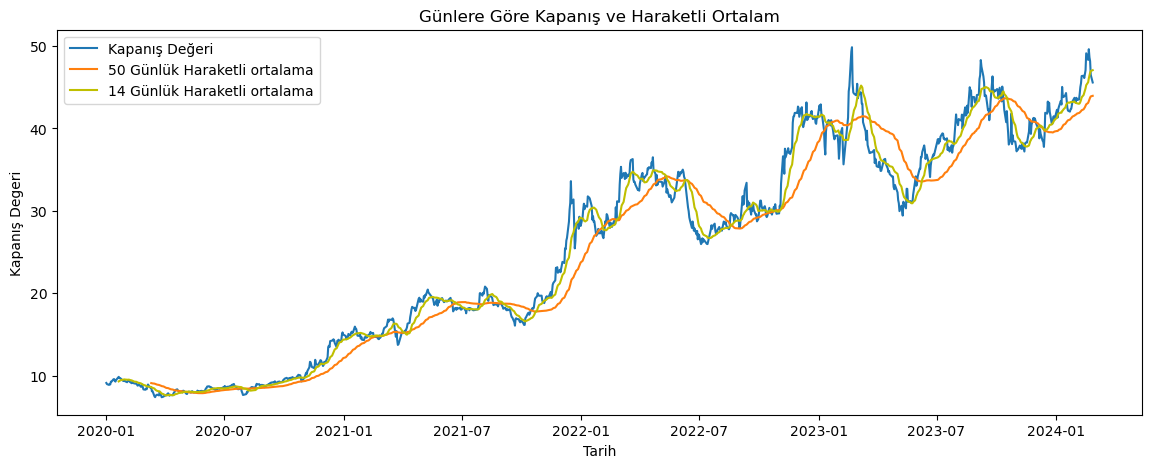

In [15]:
def sma(isim,periyot):
    veri_seti[isim] = veri_seti["Close"].rolling(window=periyot).mean()

sma("14 günlük ortalam",14)
periyot = 50
veri_seti["Hareketli_Ortalama"] = veri_seti["Close"].rolling(window=periyot).mean()
plt.figure(figsize=(14,5))
plt.xlabel("Tarih")
plt.ylabel("Kapanış Degeri")
plt.title("Günlere Göre Kapanış ve Haraketli Ortalam")
plt.plot(veri_seti["Close"],label = "Kapanış Değeri")
plt.plot(veri_seti["Hareketli_Ortalama"],label = "50 Günlük Haraketli ortalama")
plt.plot(veri_seti["14 günlük ortalam"],"y",label = "14 Günlük Haraketli ortalama")
plt.legend()

# Bollinger Bantları

<p> Bollinger Bantları, fiyat hareketlerinin volatilitesini gösteren ve aşırı alım veya aşırı satım durumlarını belirlemeye yardımcı olan bir teknik analiz aracıdır. Üç ana bileşeni vardır: orta bant (genellikle 20 günlük hareketli ortalama), üst bant (orta bandın üzerinde, genellikle standart sapmanın iki katı kadar yukarıda), ve alt bant (orta bandın altında, genellikle standart sapmanın iki katı kadar aşağıda). Fiyatlar bantların içinde kaldığında piyasanın yatay olduğu, üst bantın üzerinde olduğunda aşırı alım olduğu, ve alt bantın altında olduğunda aşırı satış olduğu düşünülür. Yatırımcılar, fiyatların bantların dışına çıktığında eğilimlerin güçlü olduğunu düşünebilirler.</p>

BOLLİNGER BANTLARI 
Orta Bant: 20 günlük basit hareketli ortalama
Üst Bant: 20 günlük basit hareketli ortalama + ( 20 günlük fiyatın standart sapması x 2)
Alt Bant: 20 günlük basit hareketli ortalama - ( 20 günlük fiyatın standart sapması x 2)

In [16]:
orta_bant_periot = 20
Orta_bant = veri_seti["Close"].rolling(window=orta_bant_periot).mean()

In [17]:
Üst_bant_periot = 20
ortalama = veri_seti["Close"].rolling(window=Üst_bant_periot).mean()
standart_sapma = veri_seti["Close"].rolling(window=Üst_bant_periot).std()
Üst_bant = ortalama + (standart_sapma * 2)

In [18]:
alt_bant = 20
ortalama = veri_seti["Close"].rolling(window=alt_bant).mean()
standart_sapma = veri_seti["Close"].rolling(window=alt_bant).std()
alt_bant = ortalama - (standart_sapma * 2)

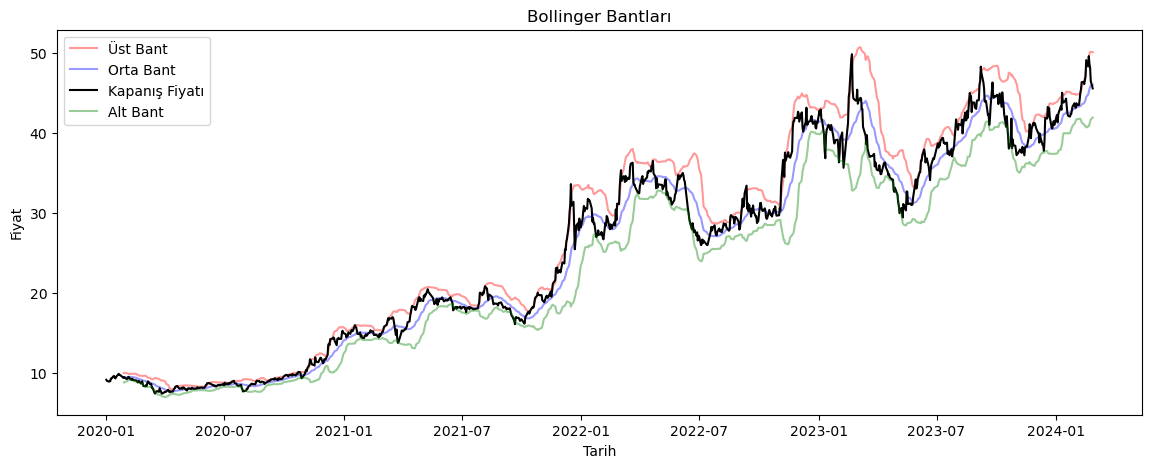

In [19]:
plt.figure(figsize=(14,5))
plt.plot(Üst_bant, color='red', label='Üst Bant', alpha=0.4)
plt.plot(Orta_bant, color='blue', label='Orta Bant', alpha=0.4)
plt.plot(veri_seti["Close"], color='black', label='Kapanış Fiyatı', alpha=1.0)
plt.plot(alt_bant, color='green', label='Alt Bant', alpha=0.4)
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.title('Bollinger Bantları')
plt.legend()

# Göreceli Güç Endeksi (RSI)

<p><strong>Göreceli(Relatif) Güç Endeksi (RSI)</strong>, ilgili periyoddaki kapanış değerlerini periyodun bir önceki kapanış değerleriyle karşılaştırarak hesaplanan kısa ve orta vadeli trendin yönü hakkında öngörüde bulunmayı sağlayan bir indikatördür.</p>

<p>Fiyat grafiği ile RSI arasında uyumlu bir görünüm vardır. RSI indikatörü, kısa sürede tepki vermesinden dolayı zaman zaman fiyatlardan önce hareketi ettiği görülebilmektedir.  Referans değerleri 30-70 seviyeleridir. 30 referans değerinin altında aşırı satım bölgesini ifade ederken trendin yukarı (AL sinyali) dönebileceğini, 70 referans değeri üzerindeki hareketler aşırı alım bölgesini ifade ederken trendin aşağı(SAT sinyali) dönebileceği sinyalini verir.</p>

In [20]:
periyot = 14
rsi = ta.rsi(veri_seti["Close"],periyot)

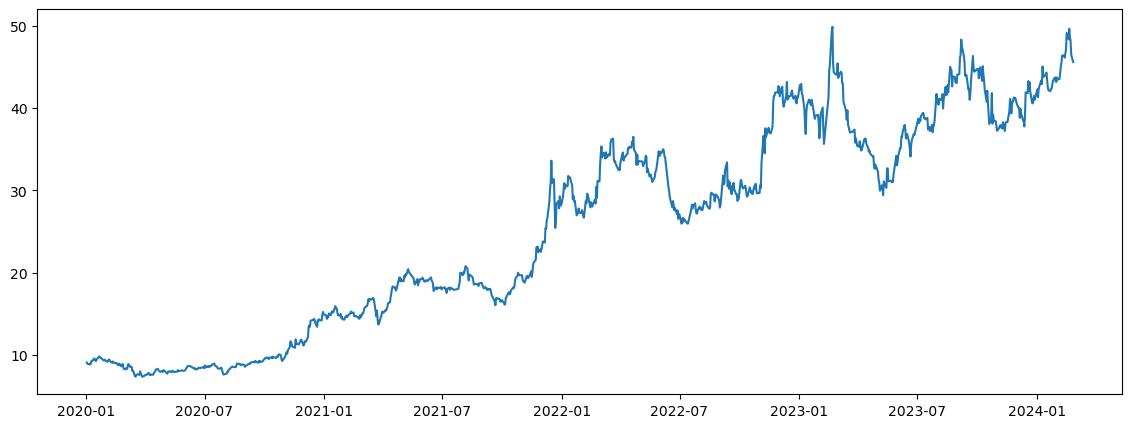

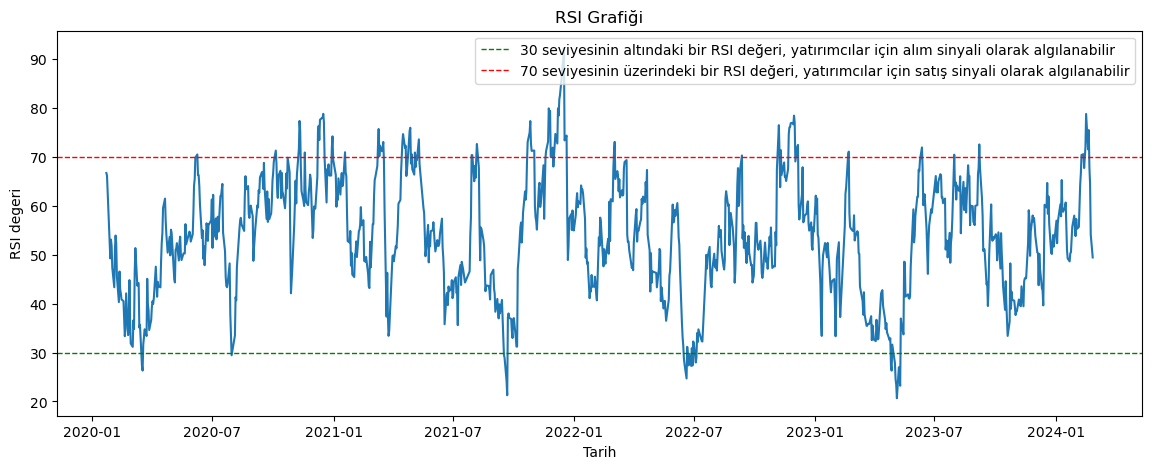

In [21]:
plt.figure(figsize=(14, 5))
plt.plot(veri_seti["Close"])
# Önce bir figür ve eksenler oluşturalım
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()

# RSI grafiğini çizelim
ax.plot(rsi)

# Daha sonra belirli seviyelerde yatay çizgileri ekleyelim
ax.axhline(30, linestyle='--', linewidth=1, color='green', label='30 seviyesinin altındaki bir RSI değeri, yatırımcılar için alım sinyali olarak algılanabilir')
ax.axhline(70, linestyle='--', linewidth=1, color='red', label='70 seviyesinin üzerindeki bir RSI değeri, yatırımcılar için satış sinyali olarak algılanabilir')

# Eksen etiketlerini ve grafiğin diğer öğelerini ekleyebiliriz
ax.set_xlabel('Tarih')
ax.set_ylabel('RSI degeri')
ax.set_title('RSI Grafiği')
ax.legend()


<p>Göreceli Güç Endeksi (RSI) 70 seviyesi üzerinde olduğunda, genellikle bir varlığın aşırı alım bölgesinde olduğu kabul edilir. Bu durumda, yatırımcılar genellikle fiyatın aşırı alım olduğu ve bir düzeltme veya geri çekilme olasılığının arttığı için satış yapma eğilimindedirler. Yani, <strong>70 seviyesinin üzerindeki bir RSI değeri, yatırımcılar için satış sinyali olarak algılanabilir.</strong></p>


<p>Göreceli Güç Endeksi (RSI) 30 seviyesi altında olduğunda, genellikle bir varlığın aşırı satım bölgesinde olduğu kabul edilir. Bu durumda, yatırımcılar genellikle fiyatın aşırı satılmış olduğu ve bir toparlanma veya yükseliş olasılığının arttığı için alım yapma eğilimindedirler. Yani, <strong>30 seviyesinin altındaki bir RSI değeri, yatırımcılar için alım sinyali olarak algılanabilir.</strong></p>


# Derin öğrenme modelinin Oluşturulması

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
y = veri_seti["Close"].values

In [194]:
x = veri_seti[["Open","High","Low","Volume"]].values

In [195]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.65)

In [196]:
print(len(y_train)," ",len(y_test))

364   678


In [197]:
x_train.shape

(364, 4)

In [198]:
y_train.shape

(364,)

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:
scaler = MinMaxScaler()

In [201]:
scaler.fit(x_train)

MinMaxScaler()

In [202]:
x_train = scaler.transform(x_train)

In [203]:
scaler.fit(x_test)

MinMaxScaler()

In [204]:
x_test = scaler.transform(x_test)

In [205]:
x_train[0:3] #verileri 0 ile 1 arasıne yerleştirdim

array([[0.03769704, 0.03088268, 0.04213076, 0.03200302],
       [0.87480002, 0.87785206, 0.8866828 , 0.25697012],
       [0.58647472, 0.61373592, 0.61694916, 0.25856833]])

In [206]:
import tensorflow as tf

In [207]:
from tensorflow.keras.models import Sequential

In [208]:
from tensorflow.keras.layers import Dense

In [209]:
model = Sequential()

In [210]:
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="relu"))

In [211]:
model.compile(optimizer ="rmsprop",loss="mse")

In [212]:
model.fit(x_train,y_train,epochs=75,verbose=0)

In [213]:
modelin_kayibi = model.history.history["loss"]

Text(0, 0.5, 'Kayıp')

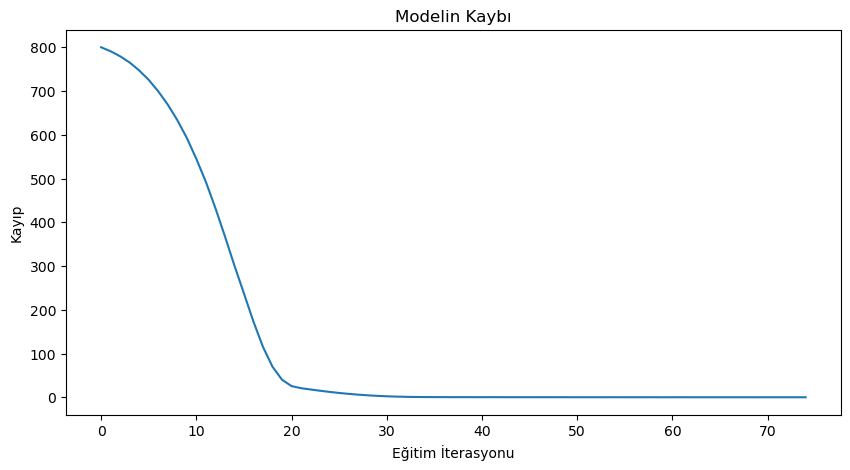

In [214]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(modelin_kayibi)),modelin_kayibi)
plt.title('Modelin Kaybı')
plt.xlabel('Eğitim İterasyonu')
plt.ylabel('Kayıp')

In [215]:
train_lose = model.evaluate(x_train,y_train)

12/12 [==============================] - 0s 2ms/step - loss: 0.2876


In [216]:
train_lose = model.evaluate(x_test,y_test)

22/22 [==============================] - 0s 1ms/step - loss: 1.1655


In [217]:
model_tahmini = model.predict(x_test)

22/22 [==============================] - 0s 1ms/step


In [218]:
karsilastirma = pd.DataFrame(y_test,columns=["Gerçek degerler"])

In [219]:
karsilastirma["Model Tahmini"] = model_tahmini

In [220]:
karsilastirma #gercek deger ile modelin karşılaştırılması

,Gerçek degerler,Model Tahmini
0,8.330000,8.321128
1,40.599998,39.282669
2,18.040001,17.599043
3,8.140000,8.302631
4,18.230000,17.894104
...,...,...
673,8.190000,8.315398
674,44.680000,43.660667
675,8.560000,8.451995
676,18.410000,17.949871


In [221]:
karsilastirma.describe()

,Gerçek degerler,Model Tahmini
count,678.000000,678.000000
mean,25.697478,24.879362
std,12.329886,11.755632
min,7.370000,7.428280
25%,14.915000,14.531969
50%,27.850000,26.982437
75%,37.020000,35.777747
max,49.860001,49.542950


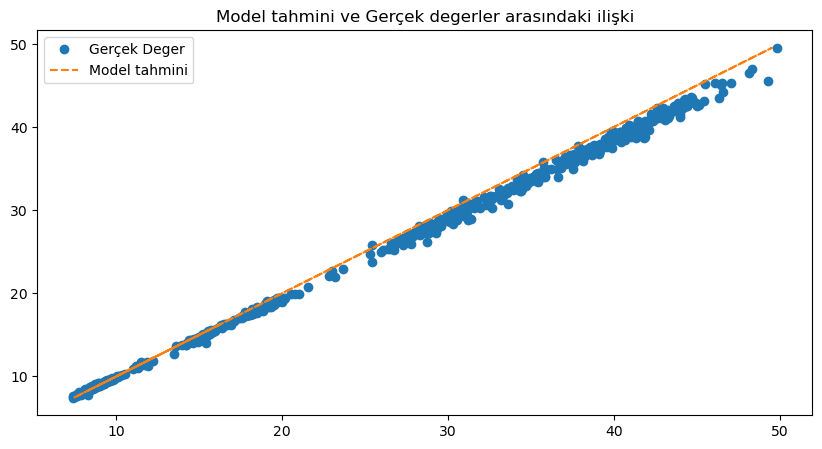

In [222]:
plt.figure(figsize=(10,5))
plt.plot(karsilastirma["Gerçek degerler"],karsilastirma["Model Tahmini"],"o",label = "Gerçek Deger")
plt.plot(karsilastirma["Model Tahmini"],karsilastirma["Model Tahmini"],"--",label = "Model tahmini")
plt.title("Model tahmini ve Gerçek degerler arasındaki ilişki")
plt.legend()

In [223]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [224]:
mae = mean_absolute_error(karsilastirma["Gerçek degerler"], karsilastirma["Model Tahmini"])

In [225]:
print("modelimizde +-",mae," hata mevcuttur")

modelimizde +- 0.8504220532105032  hata mevcuttur


In [226]:
veri_seti.describe().loc(axis=0)["mean"]["Close"]

25.566122819732108

In [227]:
#bu durumda 25.566122819732108+-1.2140729898630187 modelimizin ortalamdaki sonucudur

In [228]:
#bütün x degerleri üzerinde modelimizi çalıştıralım

In [229]:
scalerr = MinMaxScaler()

In [230]:
scalerr.fit(x)

MinMaxScaler()

In [231]:
k = scalerr.transform(x)

In [232]:
dizi = model.predict(k)

33/33 [==============================] - 0s 1ms/step


In [233]:
veri_seti["model_tahmini"] = dizi

# Modelin Gerçek verilerle test edilmesi

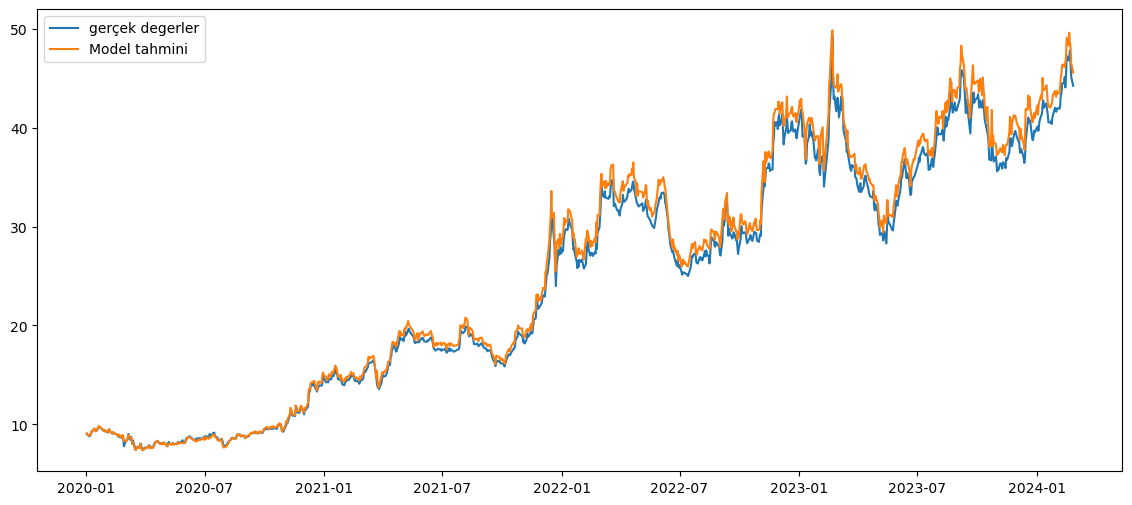

In [234]:
plt.figure(figsize=(14,6))
plt.plot(veri_seti["model_tahmini"],label = "gerçek degerler")
plt.plot(veri_seti["Close"],label  ="Model tahmini")
plt.legend()

# Modeldeki muhtemel sapma Unsuru

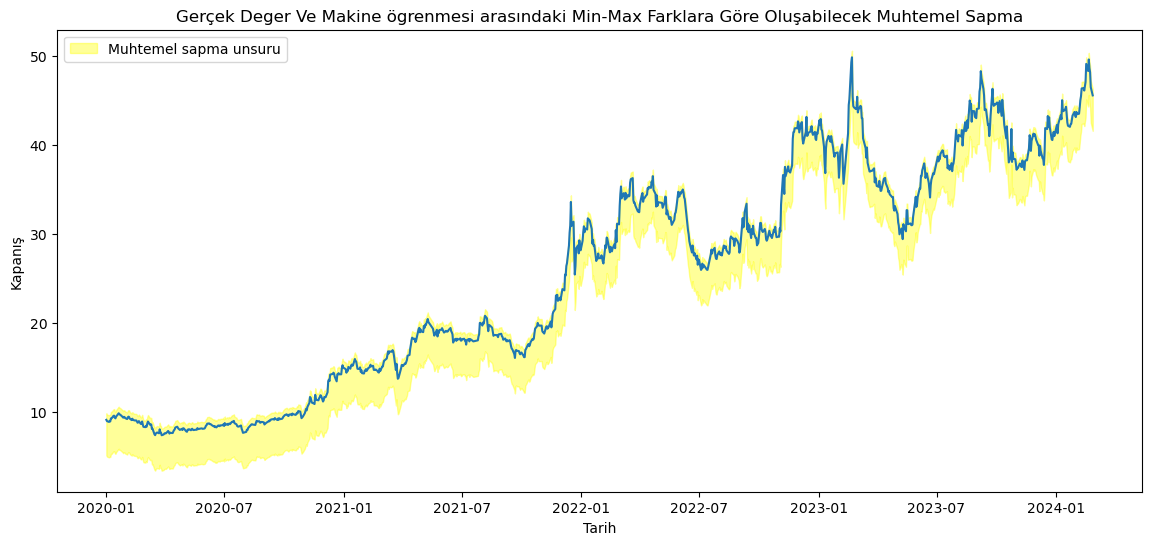

In [235]:
plt.figure(figsize=(14, 6))
plt.xlabel("Tarih")
plt.ylabel("Kapanış")
plt.title("Gerçek Deger Ve Makine ögrenmesi arasındaki Min-Max Farklara Göre Oluşabilecek Muhtemel Sapma")
x = veri_seti["Close"]
diff = veri_seti["model_tahmini"] - veri_seti["Close"]
y1 = x + diff.min()
y2 = x + diff.max()
plt.plot(veri_seti.index, x)
plt.fill_between(veri_seti.index, y1, y2, color='yellow', alpha=0.4,label ="Muhtemel sapma unsuru")
plt.legend()

veri seti üzerinde çalışarak gerçek değerler ile bir makine öğrenmesi modeli tarafından tahmin edilen değerler arasındaki olası sapmaları görselleştiriyor. Grafikte, gerçek değerler ile modelin tahmin ettiği değerler arasındaki minimum ve maksimum farkların sarı bir dolgu ile gösterilmesi, bu sapmaların ne kadar değişken olabileceğini anlamamıza yardımcı olur.

<p>Güven Aralığının Belirlenmesi: Gerçek değerlerle model tahminleri arasındaki farklar, bir güven aralığı oluşturarak gerçek değerlerin modelin tahminleriyle ne kadar uyumlu olduğunu gösterir. Bu güven aralığı, modelinizin ne kadar güvenilir tahminler yaptığını değerlendirmenize yardımcı olabilir.</p>

<p>Tahmin Belirsizliğinin Görselleştirilmesi: Oluşturulan kanal, gerçek değerlerin model tahminlerinden ne kadar sapabileceğini görselleştirir. Bu, tahminlerin belirsizliğini gösterir ve gerçek dünyadaki değişkenlikleri daha iyi anlamanıza yardımcı olabilir.</p>

<p>Sonuç olarak, gerçek değerlerle model tahminleri arasındaki farkları göz önünde bulundurarak bir kanal oluşturmak, modelinizin performansını değerlendirmenize, tahmin belirsizliğini görselleştirmenize ve karar alma sürecinde kılavuz olmanıza yardımcı olabilir.</p>